Determination of partial contributions of hadrons
-------------------------------------------------

This notebook reproduces Figure 9 from the proceedings arXiv:1503.00544.  

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir('..')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

In [2]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3_rc4a',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.Thunman, None),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#expand the rest of the options from mceq_config.py
**config
)


Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta-", "D*0", 
"D*0-bar", "XiC*0-bar", "XiC*+-bar", "XiC*+", "XiC*0", "Ds*+", "Ds*

In [3]:
res_groups = [
    (["D+", "D-", "D0", "D0-bar", "D*+", "D*-", "D*0", "D*0-bar"], r"$D^\pm + D^0$"),
    (["Ds+", "Ds-"], r"$D_s$"),
    (["K0S"], r"$K^0_s$"),
    (["K0L"], r"$K^0_L$"),
    (["LambdaC+", "LambdaC+-bar"], r'$\Lambda_C$'),
    (["OmegaC0", "OmegaC0-bar", "XiC+", 
      "XiC+-bar", "XiC0", "XiC0-bar", 
      "SigmaC*+", "SigmaC*++", "tau+", "tau-", 
      "SigmaC*++-bar", "SigmaC*+-bar", "SigmaC*0", 
      "SigmaC*0-bar", "SigmaC+", "SigmaC++", 
      "SigmaC++-bar", "SigmaC+-bar", "SigmaC0", 
      "SigmaC0-bar"], r"other prompt"),
    (["K0S", "K0L", "n", "n-bar", "p", "p-bar", 
      "Lambda0", "Lambda0-bar", "Sigma-", 
      "Sigma--bar", "Xi-", "Xi--bar", "Xi0", 
      "Xi0-bar", "Delta-", "Delta--bar", "Delta0", 
      "Delta0-bar", "K*+", "K*-", "K*0", "K*0-bar", 
      "Omega-", "Omega--bar", "Sigma*+", "Sigma*+-bar", 
      "Sigma*-", "Sigma*--bar", "Sigma*0", "Sigma*0-bar", 
      "Sigma+", "Sigma+-bar", "Sigma0", "Sigma0-bar", 
      "Delta+", "Delta++", "Delta++-bar", "Delta+-bar", 
      "Xi*-", "Xi*--bar", "Xi*0", "Xi*0-bar"],r"other conv. mu"),
    (["K0S", "K0L", "n", "n-bar", "p", "p-bar", 
      "Lambda0", "Lambda0-bar", "Sigma-", "Sigma--bar", 
      "Xi-", "Xi--bar", "Xi0", "Xi0-bar", "Delta-", 
      "Delta--bar", "Delta0", "Delta0-bar", "K*+", 
      "K*-", "K*0", "K*0-bar", "Omega-", "Omega--bar", 
      "Sigma*+", "Sigma*+-bar", "Sigma*-", "Sigma*--bar", 
      "Sigma*0", "Sigma*0-bar", "Sigma+", "Sigma+-bar", 
      "Sigma0", "Sigma0-bar", "Delta+", "Delta++", 
      "Delta++-bar", "Delta+-bar", "Xi*-", "Xi*--bar", 
      "Xi*0", "Xi*0-bar", "eta", "eta*", "omega", 
      "phi", "pi0", "rho+", "rho-", "rho0"],r"other conv. numu"),
    (["n", "n-bar", "p", "p-bar", "Lambda0", 
      "Lambda0-bar", "Sigma-", "Sigma--bar", 
      "Xi-", "Xi--bar", "Xi0", "Xi0-bar", "Delta-", 
      "Delta--bar", "Delta0", "Delta0-bar", 
      "K*+", "K*-", "K*0", "K*0-bar", "Omega-", 
      "Omega--bar", "Sigma*+", "Sigma*+-bar", "Sigma*-", 
      "Sigma*--bar", "Sigma*0", "Sigma*0-bar", "Sigma+", 
      "Sigma+-bar", "Sigma0", "Sigma0-bar", "Delta+", 
      "Delta++", "Delta++-bar", "Delta+-bar", "Xi*-", 
      "Xi*--bar", "Xi*0", "Xi*0-bar", "eta", "eta*", 
      "omega", "phi", "pi0", "rho+", "rho-", "rho0"],r"other conv. nue"),
    (["eta", "eta*", "omega", "phi", 
      "pi0", "rho+", "rho-", "rho0",
      "etaC", "jpsi"], r"unflavored"),
    (["tau+","tau-"], r"tau decay"),
    (["mu+", "mu-", "pi_mu+", "pi_mu-", 
      "k_mu+", "k_mu-", "pr_mu+", "pr_mu-"], r"$\mu$ decay")]

color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']

In [4]:
mag = 3
mu_obs = {}
numu_obs = {}
nue_obs = {}
nutau_obs = {}
for res_group, res_title in res_groups:
    mceq_run.set_obs_particles(res_group)
    mceq_run.solve()
    mu_obs[res_title] = mceq_run.get_solution('obs_mu+', mag) + \
                        mceq_run.get_solution('obs_mu-', mag)
    numu_obs[res_title] = mceq_run.get_solution('obs_numu', mag) + \
                          mceq_run.get_solution('obs_antinumu', mag)
    nue_obs[res_title] = mceq_run.get_solution('obs_nue', mag) + \
                         mceq_run.get_solution('obs_antinue', mag)
    nutau_obs[res_title] = mceq_run.get_solution('obs_nutau', mag) + \
                           mceq_run.get_solution('obs_antinutau', mag)

MCEqRun::set_obs_particles(): Converted names:D+, D-, D0, D0-bar, D*+, D*-, D*0, D*0-bar
to: 411, -411, 421, -421, 413, -413, 10421, -10421
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.20646937542e-07
    shape      : (6264, 6264)
    nnz        : 1611222
D Matrix info:
    density    : 3.16873849352e-06
    shape      : (6264, 6264)
    nnz        : 315583
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.

MCEqRun::_forward_euler(): time elapsed during integration: 6.17418408394 sec
MCEqRun::set_obs_particles(): Converted names:Ds+, Ds-
to: 431, -431
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.19210766341e-07
    shape      : (6264, 6

In [5]:
mu_conv = mceq_run.get_solution('conv_mu+', mag) + \
          mceq_run.get_solution('conv_mu-', mag)

numu_conv = mceq_run.get_solution('conv_numu', mag) + \
            mceq_run.get_solution('conv_antinumu', mag)

nue_conv = mceq_run.get_solution('conv_nue', mag) + \
           mceq_run.get_solution('conv_antinue', mag)

mu_prompt = mceq_run.get_solution('pr_mu+', mag) + \
          mceq_run.get_solution('pr_mu-', mag)

numu_prompt = mceq_run.get_solution('pr_numu', mag) + \
            mceq_run.get_solution('pr_antinumu', mag)

nue_prompt = mceq_run.get_solution('pr_nue', mag) + \
           mceq_run.get_solution('pr_antinue', mag)


mu_total = mceq_run.get_solution('total_mu+', mag) + \
           mceq_run.get_solution('total_mu-', mag)

numu_total = mceq_run.get_solution('total_numu', mag) + \
            mceq_run.get_solution('total_antinumu', mag)

nue_total = mceq_run.get_solution('total_nue', mag) + \
            mceq_run.get_solution('total_antinue', mag)

nutau_total = mceq_run.get_solution('total_nutau', mag) + \
              mceq_run.get_solution('total_antinutau', mag)

mu_pi = mceq_run.get_solution('pi_mu+', mag) + \
           mceq_run.get_solution('pi_mu-', mag)

numu_pi = mceq_run.get_solution('pi_numu', mag) + \
            mceq_run.get_solution('pi_antinumu', mag)

nue_pi = mceq_run.get_solution('pi_nue', mag) + \
            mceq_run.get_solution('pi_antinue', mag)

mu_k = mceq_run.get_solution('k_mu+', mag) + \
           mceq_run.get_solution('k_mu-', mag)

numu_k = mceq_run.get_solution('k_numu', mag) + \
            mceq_run.get_solution('k_antinumu', mag)

nue_k = mceq_run.get_solution('k_nue', mag) + \
            mceq_run.get_solution('k_antinue', mag)

/Users/afedynitch/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


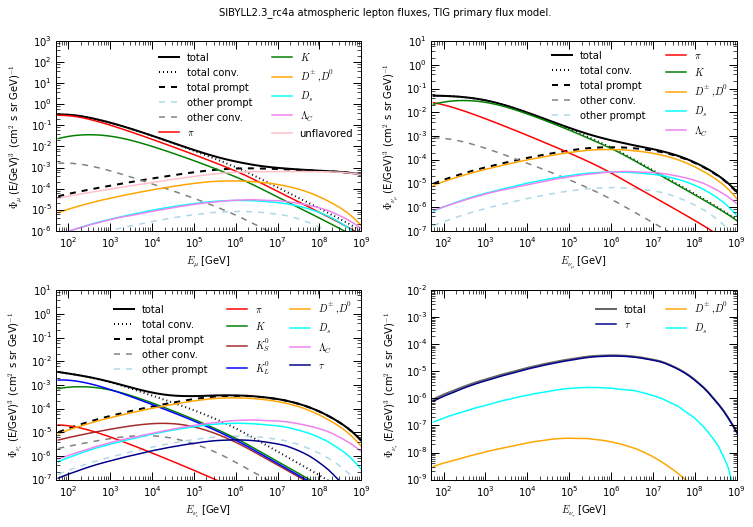

In [6]:
color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']
fig = plt.figure(figsize=(11, 7.5))
fig.set_tight_layout(dict(rect=[0.01, 0.01, 0.97, 0.95]))
e_grid = mceq_run.e_grid
plt.suptitle('{0} atmospheric lepton fluxes, {1} primary flux model.'.format(mceq_run.iamodel_name,
                                                                             mceq_run.pmodel.sname))
plt.subplot(221)        
plt.plot(e_grid, mu_total, ls='-', lw=2, color='black', label='total')
plt.plot(e_grid, mu_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
plt.plot(e_grid, mu_prompt, ls='--', lw=2, color='black', label='total prompt')
plt.plot(e_grid, mu_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
plt.plot(e_grid, mu_obs['other conv. mu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
plt.plot(e_grid, mu_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
plt.plot(e_grid, mu_k, ls='-', lw=1.5, color='green', label=r'$K$')
plt.plot(e_grid, mu_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, mu_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
plt.plot(e_grid, mu_obs['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
plt.plot(e_grid, mu_obs['unflavored'], ls='-', lw=1.5, color='pink', label=r'unflavored')

plt.loglog()
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-6, 1e3])
plt.legend(loc='upper right', frameon=False, numpoints=1, ncol=2)

plt.subplot(222)
plt.plot(e_grid, numu_total, ls='-', lw=2, color='black', label='total')
plt.plot(e_grid, numu_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
plt.plot(e_grid, numu_prompt, ls='--', lw=2, color='black', label='total prompt')
plt.plot(e_grid, numu_obs['other conv. numu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
plt.plot(e_grid, numu_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
plt.plot(e_grid, numu_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
plt.plot(e_grid, numu_k, ls='-', lw=1.5, color='green', label=r'$K$')
plt.plot(e_grid, numu_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, numu_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
plt.plot(e_grid, numu_obs['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
plt.loglog()
plt.xlabel(r"$E_{\nu_{\mu}}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_{\mu}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-7, 1e1])
plt.legend(loc='upper right', frameon=False, numpoints=1, ncol=2)

plt.subplot(223)
plt.plot(e_grid, nue_total, ls='-', lw=2, color='black', label='total')
plt.plot(e_grid, nue_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
plt.plot(e_grid, nue_prompt, ls='--', lw=2, color='black', label='total prompt')
plt.plot(e_grid, nue_obs['other conv. nue'], ls='--', lw=1.5, color='grey', label=r'other conv.')
plt.plot(e_grid, nue_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
plt.plot(e_grid, nue_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
plt.plot(e_grid, nue_k, ls='-', lw=1.5, color='green', label=r'$K$')
plt.plot(e_grid, nue_obs['$K^0_s$'], ls='-', lw=1.5, color='brown', label=r'$K^0_S$')
plt.plot(e_grid, nue_obs['$K^0_L$'], ls='-', lw=1.5, color='blue', label=r'$K^0_L$')
# plt.plot(e_grid, nue_obs['$\\mu$ decay'], ls='-', lw=1.5, color='pink', label=r'$\mu$ decay')
plt.plot(e_grid, nue_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, nue_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
plt.plot(e_grid, nue_obs['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
plt.plot(e_grid, nue_obs["tau decay"], ls='-', lw=1.5, color='darkblue', label=r'$\tau$')

plt.loglog()
plt.xlabel(r"$E_{\nu_{e}}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_{e}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-7, 1e1])
plt.legend(loc=1, frameon=False, numpoints=1, ncol=3)

plt.subplot(224)
plt.plot(e_grid, nutau_total, ls='-', lw=2, color='black', alpha=0.6, label='total')
plt.plot(e_grid, nutau_obs["tau decay"], ls='-', lw=1.5, color='darkblue', label=r'$\tau$')
plt.plot(e_grid, nutau_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, nutau_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')


plt.loglog()
plt.xlabel(r"$E_{\nu_{\tau}}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-9, 1e-2])
plt.legend(loc=1, frameon=False, numpoints=1, ncol=2)

plt.savefig('detailed_flux_sib23_rc4b.pdf')
